In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from subprocess import Popen, PIPE

def Input(sigma_m,E_th,slope):
    sigma_m=sigma_m*1e-20
    slope=slope*1e-20
    f=open("LXCat0.txt","w")
    n=500
    E=np.logspace(-3,1,n)

    f.write('----------------------\n')
    f.write('ELASTIC\nReid\n')
    f.write('1.371541e-4 / mass ratio\n')
    f.write('----------------------\n')
    
    for i in range(n):
        f.write(str(E[i])+' '+str(sigma_m)+'\n')

    
    f.write('----------------------\n')
    f.write('EXCITATION\nReid\n')
    f.write(str(E_th)+' / Thresold Energy\n')
    f.write('1.371541e-4 / mass ratio\n')
    f.write('----------------------\n')
    sigma_exc=slope*(E-E_th)*np.heaviside(E-E_th,1)
    for i in range(n):
        f.write(str(E[i])+' '+str(sigma_exc[i])+'\n')
    
    plt.loglog(E,(sigma_m+sigma_exc)*1e20)
    plt.show()
    
    f.close()
    
def ex(grid=100):
        f=open("ex.dat","w")
        f.write("READCOLLISIONS\n")
        f.write("LXCat0.txt\nReid\n1\n")
        f.write("CONDITIONS\n")
        f.write("1       / Electric field / N (Td)\n")
        f.write("0        / Angular field frequency / N (m3/s)\n")
        f.write("0.        / Cosine of E-B field angle\n")
        f.write("0.       / Gas temperature (K)\n")
        f.write("300.      / Excitation temperature (K)\n")
        f.write("0.        / Transition energy (eV)\n")
        f.write("0.        / Ionization degree\n")
        f.write("1e-6      / Plasma density (1/m3)\n")
        f.write("1.        / Ion charge parameter\n")
        f.write("1.        / Ion/neutral mass ratio\n")
        f.write("1         / e-e momentum effects: 0=No; 1=Yes*\n")
        f.write("1         / Energy sharing: 1=Equal*; 2=One takes all\n")
        f.write("1         / Growth: 1=Temporal*; 2=Spatial; 3=Not included; 4=Grad-n expansion\n")
        f.write("0.        / Maxwellian mean energy (eV) \n")
        f.write(str(grid)+"      / # of grid points\n")
        f.write("0         / Manual grid: 0=No; 1=Linear; 2=Parabolic \n")
        f.write("1000.      / Manual maximum energy (eV)\n")
        f.write("1e-10     / Precision\n")
        f.write("1e-5      / Convergence\n")
        f.write("1000      / Maximum # of iterations\n")
        f.write("1        / Gas composition fractions\n")
        f.write("1         / Normalize composition to unity: 0=No; 1=Yes\n")
        f.write("RUNSERIES\n")
        f.write("1          / Variable: 1=E/N; 2=Mean energy; 3=Maxwellian energy \n")
        f.write("0.001 1000.  / Min Max\n")
        f.write("1000         / Number \n")
        f.write("3          / Type: 1=Linear; 2=Quadratic; 3=Exponential\n")
        f.write("SAVERESULTS\n")
        f.write("Reid.dat        / File \n")
        f.write("3        / Format: 1=Run by run; 2=Combined; 3=E/N; 4=Energy; 5=SIGLO; 6=PLASIMO\n")
        f.write("1        / Conditions: 0=No; 1=Yes\n")
        f.write("1        / Transport coefficients: 0=No; 1=Yes\n")
        f.write("1        / Rate coefficients: 0=No; 1=Yes\n")
        f.write("0        / Reverse rate coefficients: 0=No; 1=Yes\n")
        f.write("0        / Energy loss coefficients: 0=No; 1=Yes\n")
        f.write("1        / Distribution function: 0=No; 1=Yes \n")
        f.write("0        / Skip failed runs: 0=No; 1=Yes\n")
        f.write("END")
        f.close()
        
def Bolsig():
    t=time.time()
    process = Popen(['./bolsigminus', 'ex.dat'], stdout=PIPE, stderr=PIPE)
    stdout, stderr = process.communicate()
    #print (stdout)
    
def Output():
    f=open("Reid.dat","r")
    n=512
    
    E=np.zeros(n)
    out=np.zeros((n,3))
    for line in f:
        if line[:8]=='E/N (Td)' and line[8:].strip()=='Mean energy (eV)':
            for i in range(n):
                l=f.readline().strip()
                if len(l)==0: break
                E[i], out[i,0] = [float(x) for x in l.split()]
        if line[:8]=='E/N (Td)' and line[8:].strip()=='Mobility *N (1/m/V/s)':
            for i in range(n):
                l=f.readline().strip()
                if len(l)==0: break
                E[i], out[i,1] = [float(x) for x in l.split()]
        if line[:8]=='E/N (Td)' and line[8:].strip()=='Diffusion coefficient *N (1/m/s)':
            for i in range(n):
                l=f.readline().strip()
                if len(l)==0: break
                E[i], out[i,2] = [float(x) for x in l.split()]

    out[:,1]=out[:,1]*E*1e-21 #Drift Velocity
    out[:,2]=out[:,2]*1e-24 #Diffusion coefficient
    
    #plt.loglog(E,out[:,0])
    #plt.show()
    #plt.loglog(E,out[:,1])
    #plt.show()
    #plt.loglog(E,out[:,2])
    #plt.show()
    
    #print('time:',time.time()-t)
    return np.log10(out)


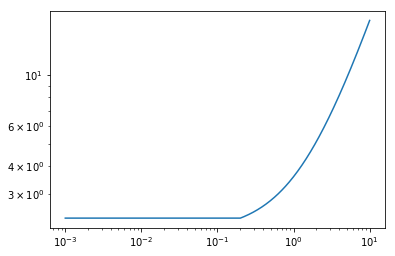

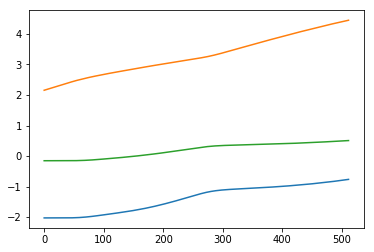

0 

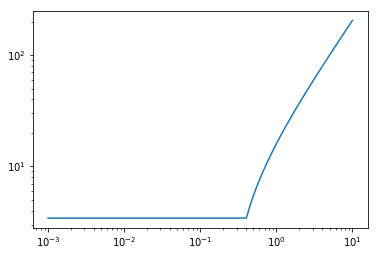

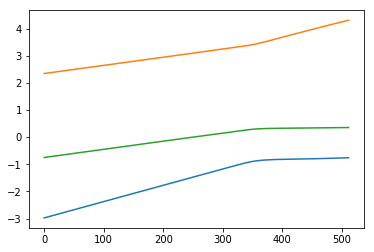

1 

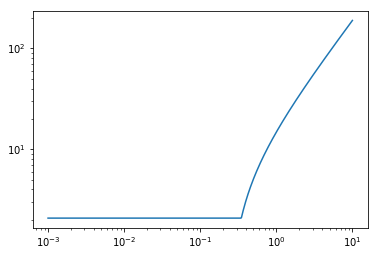

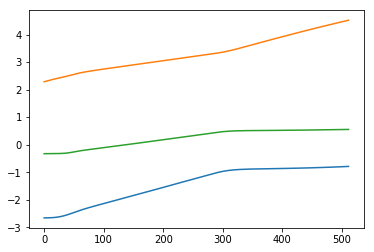

2 

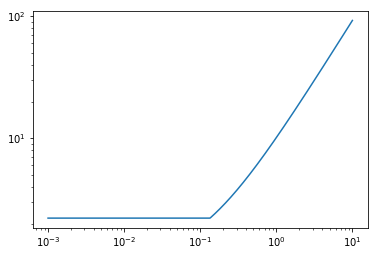

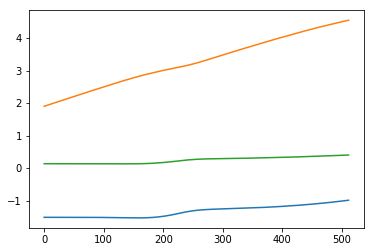

3 22.453747987747192


In [4]:
#cross=open('Y.csv','wb')
#trans=open('X.csv','wb')

n=4
sigma_m=10**(np.random.rand(n)) #in (1 to 10) (Angstrom)^2
E_th=10**(np.random.rand(n)-1)  #in (0.1 to 1) eV 
slope=10**(np.random.rand(n)*2) #in (1 to 100) (Angstrom)^2
Y=np.zeros((n,3))
Y[:,0]=sigma_m
Y[:,1]=E_th
Y[:,2]=slope

t=time.time()
#np.savetxt(cross,Y,delimiter=',')
for i in range(n):
    Input(Y[i,0],Y[i,1],Y[i,2])
    ex(grid=100)
    Bolsig()
    X=Output()
    #np.savetxt(trans,np.reshape(X,(1,-1)),delimiter=',')
    plt.plot(X[:,0])
    plt.plot(X[:,1])
    plt.plot(X[:,2])
    plt.show()
    print(i,end=' ')
print(time.time()-t)
#cross.close()
#trans.close()